In [ ]:
# import libraries 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd

In [ ]:
# Parameters
R = 6  # Party reward
c_vals = np.linspace(0, 10, 500)

# Define expected max for uniform distribution U[w_low, w_high]
def expected_max(R, w_low, w_high):
    if R <= w_low:
        return (w_low + w_high) / 2
    elif R >= w_high:
        return R
    else:
        return (R * (R - w_low) + 0.5 * (w_high**2 - R**2)) / (w_high - w_low)

In [ ]:
def expected_utility(R, w_low, w_high, p):
    E_w = (w_low + w_high) / 2
    if R <= w_low:
        return E_w
    elif R >= w_high:
        return p * R + (1 - p) * E_w
    else:
        E_max = (R * (R - w_low) + 0.5 * (w_high**2 - R**2)) / (w_high - w_low)
        return p * E_max + (1 - p) * E_w

# Agent types dictionary 
agents = {
    "High competence": {"w_low": 3, "w_high": 9, "p": 0.9},
    "Low competence": {"w_low": 1, "w_high": 6, "p": 0.5}
}
print("Agent types and their parameters:")
for agent, params in agents.items():
    print(f"{agent}: w_low={params['w_low']}, w_high={params['w_high']}, p={params['p']}")

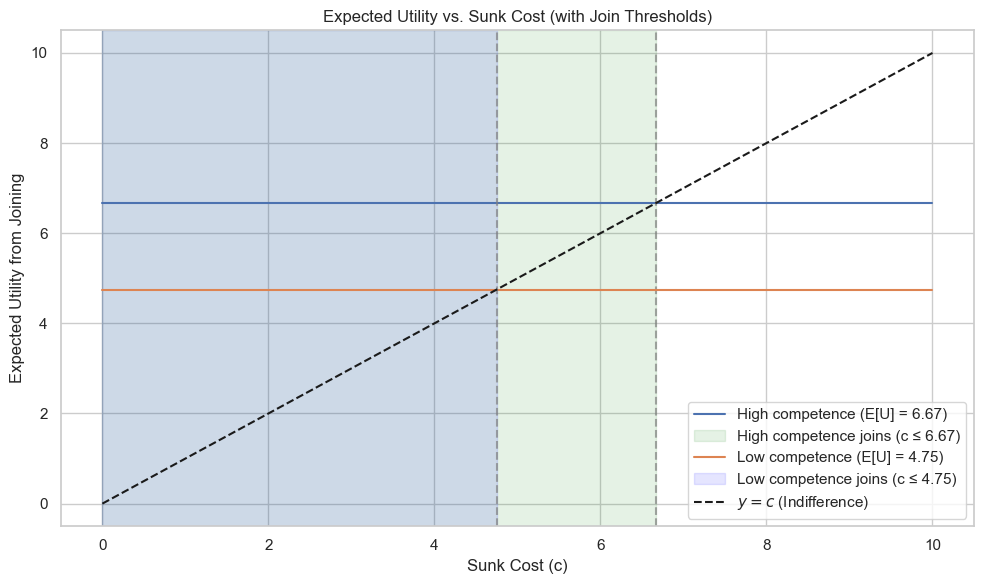

In [ ]:
# Set style 
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
# Plotting
for label, params in agents.items():
    E_alpha = expected_utility(R, params["w_low"], params["w_high"], params["p"])
    plt.plot(c_vals, np.full_like(c_vals, E_alpha), label=f"{label} (E[U] = {E_alpha:.2f})")
    
    # Add vertical line at c = E_alpha (joining threshold)
    if c_vals[0] <= E_alpha <= c_vals[-1]:
        plt.axvline(x=E_alpha, linestyle='--', color='gray', alpha=0.7)
        # Shade the region where the agent joins (i.e., c <= E_alpha)
        plt.axvspan(0, E_alpha, color='green' if label == "High competence" else 'blue', 
                    alpha=0.1, label=f"{label} joins (c ≤ {E_alpha:.2f})")
        # plt.text(E_alpha + 0.1, E_alpha-4.6, f"{label} threshold c* ≈ {E_alpha:.2f}",
        #          rotation=90, fontsize=9, verticalalignment='bottom', color='gray')

# Indifference line
plt.plot(c_vals, c_vals, 'k--', label=r"$y = c$ (Indifference)")

plt.xlabel("Sunk Cost (c)")
plt.ylabel("Expected Utility from Joining")
plt.title("Expected Utility vs. Sunk Cost (with Join Thresholds)")
plt.legend()
plt.tight_layout()
plt.show()